<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#helper-functions" data-toc-modified-id="helper-functions-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>helper functions</a></span></li><li><span><a href="#Examples-with-Dummy-data" data-toc-modified-id="Examples-with-Dummy-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Examples with Dummy data</a></span><ul class="toc-item"><li><span><a href="#2-uncorrelated-features" data-toc-modified-id="2-uncorrelated-features-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>2 uncorrelated features</a></span></li></ul></li><li><span><a href="#Positive-correlation" data-toc-modified-id="Positive-correlation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Positive correlation</a></span><ul class="toc-item"><li><span><a href="#correlated-with-target" data-toc-modified-id="correlated-with-target-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>correlated with target</a></span></li><li><span><a href="#model-intepretation" data-toc-modified-id="model-intepretation-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>model intepretation</a></span></li></ul></li><li><span><a href="#negative-correlation" data-toc-modified-id="negative-correlation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>negative correlation</a></span></li><li><span><a href="#weird-shape-(sinus)" data-toc-modified-id="weird-shape-(sinus)-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>weird shape (sinus)</a></span></li><li><span><a href="#Interactions" data-toc-modified-id="Interactions-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Interactions</a></span></li><li><span><a href="#unaccounted-effects" data-toc-modified-id="unaccounted-effects-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>unaccounted effects</a></span></li></ul></div>

In [3]:
import os
print(os.getcwd())
base = os.path.join(os.pardir,os.pardir)


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import xgboost as xgb
import shap



## Set plotting style
plt.style.use('ggplot')

sns.set(rc={'figure.figsize':(4,3)})
sns.set(font_scale=1.5)

## Set query project
plt.rcParams.update({'font.size': 16})

## set paths
outpath = os.path.join(base,"results")


/Users/epedersen/mlclub/ml_club/06_shap_demo


# helper functions

In [4]:
def train_xgb_classifier(df, lr=0.01, max_depth=5,target="target"):
    df_train, df_test = train_test_split(df, test_size=0.3)
    model = xgb.XGBClassifier(learning_rate=lr, max_depth=max_depth, n_jobs=4,)
    model.fit(df_train.drop(labels=[target], axis = 1), df_train[target])
    return model, df_train, df_test


def train_xgb_regressor(df, lr=0.01, max_depth=5,target="target"):
    df_train, df_test = train_test_split(df, test_size=0.3)
    model = xgb.XGBRegressor(learning_rate=lr, max_depth=max_depth, n_jobs=4,)
    model.fit(df_train.drop(labels=[target], axis = 1), df_train[target])
    return model, df_train, df_test


def plot_feature_graphs(model, X, plot_all=True):
    #xgb.plot_importance(model)
    plt.show()
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X)
    shap.summary_plot(shap_values, X)
    shap.summary_plot(shap_values, X, plot_type='bar')
    if plot_all:
        for c in X.columns:
            shap.dependence_plot(c,shap_values,X)

# Examples with Dummy data

In [14]:
n = int(1E4)
noise = 0.05

a_rand = np.random.normal(0,1,n)
b_rand = np.random.normal(0,1,n)
c_rand = np.random.normal(0,1,n)



t_noise = np.random.normal(0,noise,n)


## 2 uncorrelated features

Text(0, 0.5, 'b')

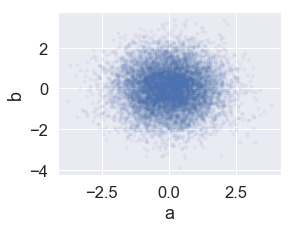

In [7]:
plt.plot(a_rand,b_rand,".",alpha=0.05)
plt.xlabel("a")
plt.ylabel("b")

# Positive correlation

## correlated with target

Text(0, 0.5, 't')

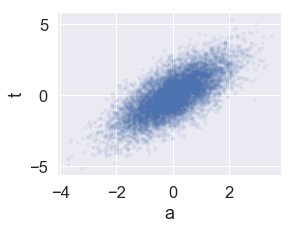

In [59]:
target_rand = (a_rand 
               + b_rand 
               + t_noise 
              )

plt.plot(a_rand,target_rand,".",alpha=0.05)
plt.xlabel("a")
plt.ylabel("t")


## model intepretation

/Users/epedersen/.pyenv/versions/3.7.0/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/epedersen/.pyenv/versions/3.7.0/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[22:41:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


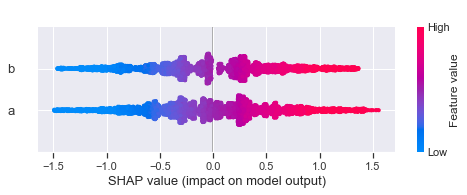

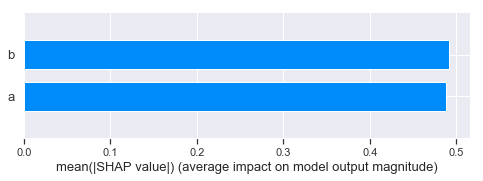

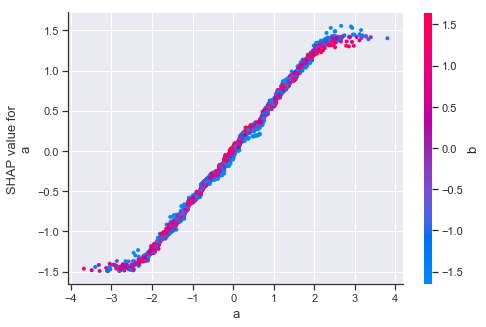

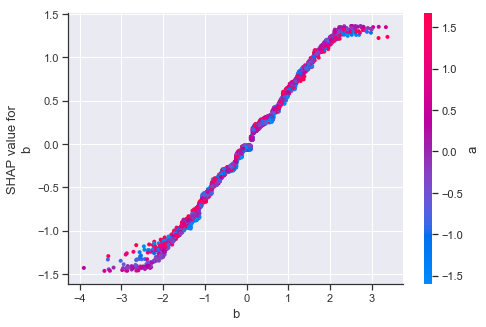

In [10]:
# make it a dataframe
df = pd.DataFrame(np.transpose([a_rand,b_rand,target_rand]),columns=["a","b","target"])

model, df_train, df_test = train_xgb_regressor(df)
plot_feature_graphs(model, df_train.drop(labels=['target'], axis=1))

# negative correlation

/Users/epedersen/.pyenv/versions/3.7.0/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/epedersen/.pyenv/versions/3.7.0/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[11:50:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


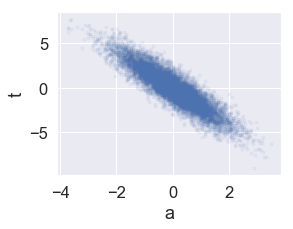

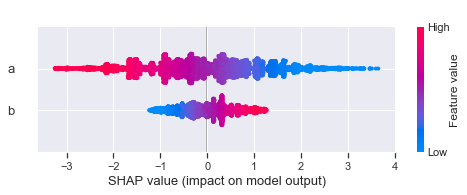

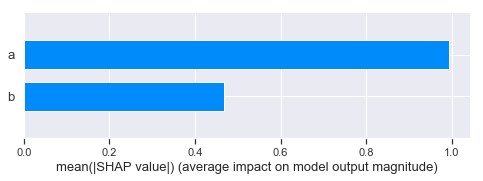

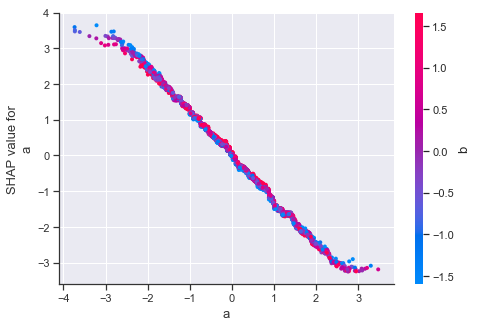

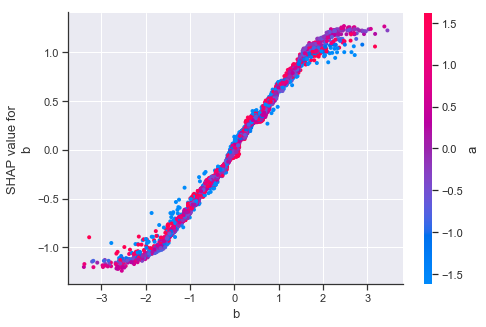

In [61]:
# gen data
# ----
# VIP change a coefficient to -2 
# ---
a_factor = -2

target_rand = (a_factor*a_rand 
               + b_rand 
               + t_noise
              )

plt.figure(2)
plt.plot(a_rand,target_rand,".",alpha=0.05)
plt.xlabel("a")
plt.ylabel("t")

# Build dataframe
df = pd.DataFrame(np.transpose([a_rand,b_rand,target_rand]),columns=["a","b","target"])

# build model
#model, df_train, df_test = train_xgb_classifier(df)
model, df_train, df_test = train_xgb_regressor(df)



plot_feature_graphs(model, df_train.drop(labels=['target'], axis=1))

# weird shape (sinus)

/Users/epedersen/.pyenv/versions/3.7.0/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/epedersen/.pyenv/versions/3.7.0/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[11:01:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


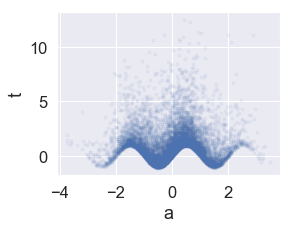

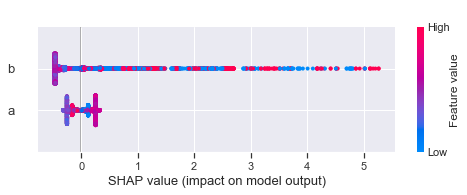

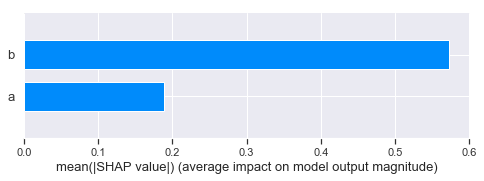

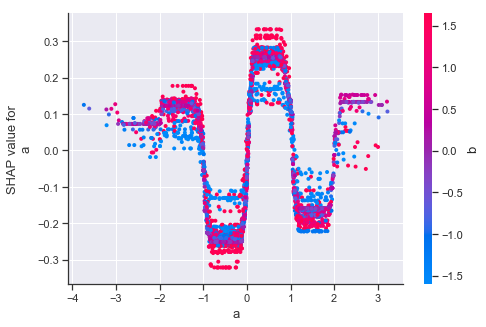

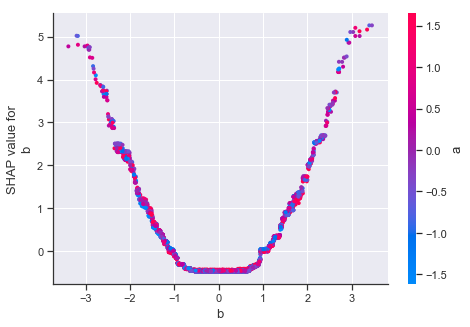

In [53]:


target_rand = ( np.sin(np.pi*a_rand) 
               + b_rand**2 
               + t_noise
              )

plt.figure(2)
plt.plot(a_rand,target_rand,".",alpha=0.05)
plt.xlabel("a")
plt.ylabel("t")

# Build dataframe
df = pd.DataFrame(np.transpose([a_rand,b_rand,target_rand]),columns=["a","b","target"])

# build model
#model, df_train, df_test = train_xgb_classifier(df)
model, df_train, df_test = train_xgb_regressor(df)



plot_feature_graphs(model, df_train.drop(labels=['target'], axis=1))

# Interactions

/Users/epedersen/.pyenv/versions/3.7.0/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/epedersen/.pyenv/versions/3.7.0/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[11:30:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


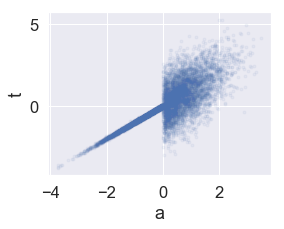

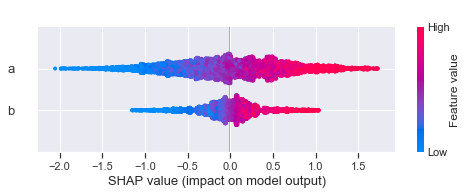

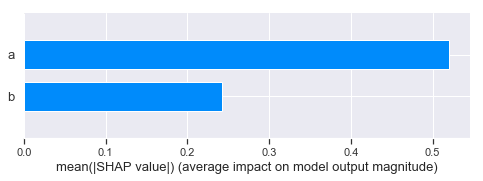

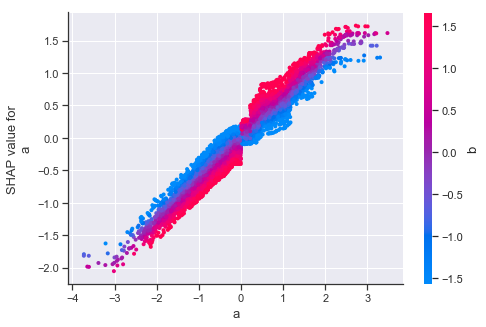

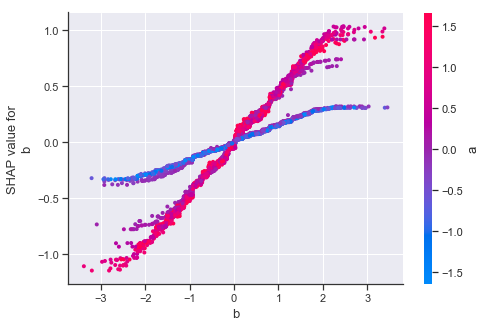

In [54]:
target_rand = ( a_rand + 
               (a_rand>0)*b_rand
               + t_noise
              )

plt.figure(2)
plt.plot(a_rand,target_rand,".",alpha=0.05)
plt.xlabel("a")
plt.ylabel("t")

# Build dataframe
df = pd.DataFrame(np.transpose([a_rand,b_rand,target_rand]),columns=["a","b","target"])

# build model
#model, df_train, df_test = train_xgb_classifier(df)
model, df_train, df_test = train_xgb_regressor(df)



plot_feature_graphs(model, df_train.drop(labels=['target'], axis=1))

# unaccounted effects

/Users/epedersen/.pyenv/versions/3.7.0/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/epedersen/.pyenv/versions/3.7.0/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[11:35:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


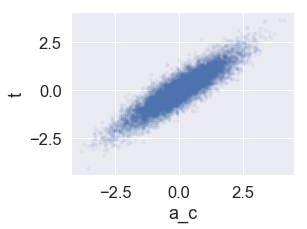

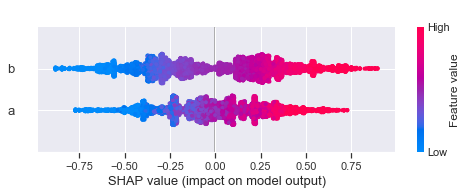

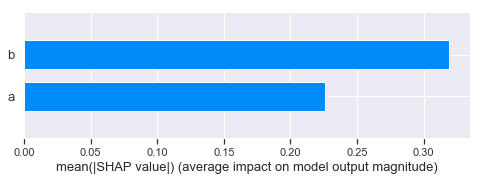

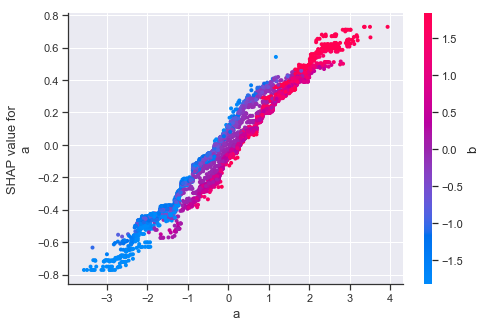

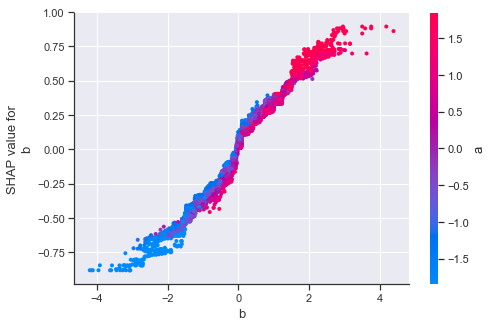

In [56]:
a_rand_c = c_rand + 0.5*a_rand
b_rand_c = c_rand + 0.5*b_rand

target_rand = c_rand + t_noise

plt.figure(2)
plt.plot(a_rand_c,target_rand,".",alpha=0.05)
plt.xlabel("a_c")
plt.ylabel("t")

# Build dataframe
df = pd.DataFrame(np.transpose([a_rand_c,b_rand_c,target_rand]),columns=["a","b","target"])

# build model
#model, df_train, df_test = train_xgb_classifier(df)
model, df_train, df_test = train_xgb_regressor(df)

#df2 = pd.DataFrame(np.transpose([a_rand,a_rand+b_rand,target_rand]),columns=["a","b","c","target"])



plot_feature_graphs(model, df_train.drop(labels=['target'], axis=1))

/Users/epedersen/.pyenv/versions/3.7.0/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/epedersen/.pyenv/versions/3.7.0/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[11:35:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


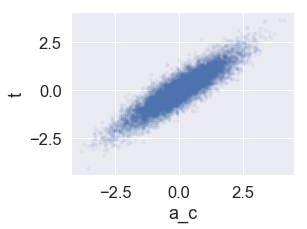

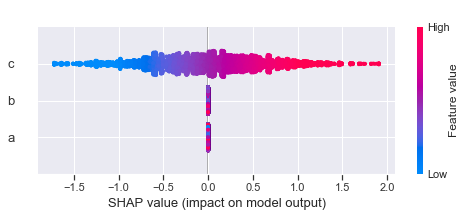

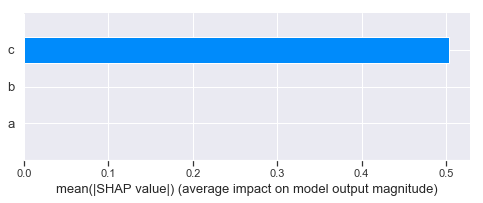

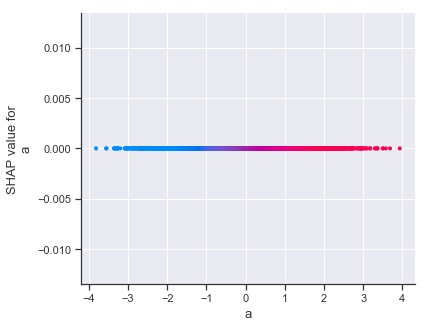

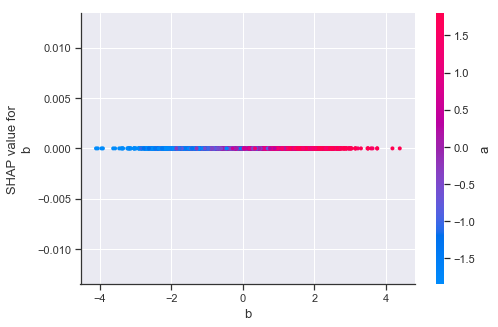

/Users/epedersen/.local/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/epedersen/.local/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


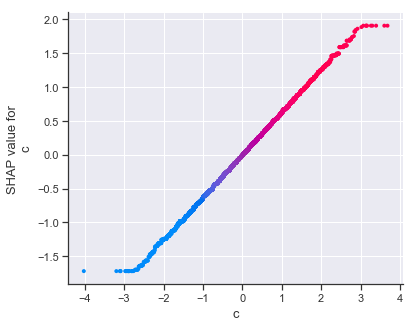

In [57]:
a_rand_c = c_rand + 0.5*a_rand
b_rand_c = c_rand + 0.5*b_rand

target_rand = c_rand + t_noise

plt.figure(2)
plt.plot(a_rand_c,target_rand,".",alpha=0.05)
plt.xlabel("a_c")
plt.ylabel("t")

# Build dataframe
df = pd.DataFrame(np.transpose([a_rand_d,b_rand_d,c_rand,target_rand]),columns=["a","b","c","target"])

# build model
#model, df_train, df_test = train_xgb_classifier(df)
model, df_train, df_test = train_xgb_regressor(df)

#df2 = pd.DataFrame(np.transpose([a_rand,a_rand+b_rand,target_rand]),columns=["a","b","c","target"])



plot_feature_graphs(model, df_train.drop(labels=['target'], axis=1))

## Model limitations